<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/11_4_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.optim as optim

In [ ]:
dataset = np.loadtxt('/gdrive/My Drive/Colab Notebooks/Pytorch/pytorch_for_everyone/data/02_stock_daily.csv', delimiter=',', dtype=np.float32)

In [ ]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [ ]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [ ]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [ ]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [ ]:
# load data
dataset = dataset[::-1]  # reverse order

# split train-test set
train_size = int(len(dataset) * 0.7)
train_set = dataset[0:train_size]
test_set = dataset[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.9272721  0.9182059  0.9088355  0.25397408 0.89540213]
 [0.99026114 1.         0.97474223 0.22792521 0.9612345 ]] -> [0.9889601]
[[0.89060974 0.8873803  0.9106556  0.08772573 0.8927989 ]
 [0.8617385  0.87704253 0.88392895 0.09387367 0.88351536]
 [0.8802111  0.8723121  0.8813425  0.1406413  0.8746237 ]
 [0.8713518  0.87250006 0.87920314 0.15194073 0.87805796]
 [0.9272721  0.9182059  0.9088355  0.25397408 0.89540213]
 [0.99026114 1.         0.97474223 0.22792521 0.9612345 ]
 [1.         0.9876259  0.9957213  0.20748846 0.9889601 ]] -> [1.]
[[0.8617385  0.87704253 0.88392895 0.09387367 0.88351536]
 [0.8802111  0.8723121  0.8813425  0.1406413  0.8746237 ]
 [0.8713518  0.87250006 0.87920314 0.15194073 0.87805796]
 [0.9272721  0.9182059  0.9088355  0.25397408 0.89540213]
 [0.99026114 1.         0.97474223 0.22792521 0.9612345 ]
 [1.         0.9876259  0.9957213  0.20748846 0.9889601 ]
 [0.97427034 0.9806401  0.9894946  0.09093131 1.        ]] -> [0.9629

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [ ]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.34669026732444763
1 0.27888259291648865
2 0.22347144782543182
3 0.17790324985980988
4 0.14043928682804108
5 0.11008549481630325
6 0.08668191730976105
7 0.07082489132881165
8 0.0634196549654007
9 0.0642562210559845
10 0.06952918320894241
11 0.07346653938293457
12 0.07329481095075607
13 0.06934849917888641
14 0.0632471889257431
15 0.05667973682284355
16 0.050854600965976715
17 0.04636822268366814
18 0.043303802609443665
19 0.041418615728616714
20 0.04032290726900101
21 0.03960698843002319
22 0.038915347307920456
23 0.03798314556479454
24 0.03664923086762428
25 0.034853946417570114
26 0.03262747824192047
27 0.030073119327425957
28 0.02734704315662384
29 0.024634147062897682
30 0.02211782895028591
31 0.019942952319979668
32 0.018175428733229637
33 0.016770077869296074
34 0.015566608868539333
35 0.014333536848425865
36 0.01286032609641552
37 0.011062740348279476
38 0.009042197838425636
39 0.0070564295165240765
40 0.005407942458987236
41 0.004298458341509104
42 0.0037127903196960688
43 0

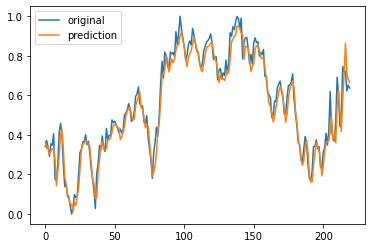

In [ ]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()